This code demonstrates how to implement a quantum neural network using PennyLane, a library designed for quantum machine learning.
The goal of this implementation is to approximate the sine function using a quantum circuit.
Below is a breakdown of the key components of the code.

Importing Libraries
The code begins by importing the necessary libraries:

In [1]:
import pennylane as qml
from pennylane import numpy as np
from pennylane.templates import RandomLayers
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
#A quantum device is created with a single qubit
dev = qml.device("default.qubit", wires=1)

Defining the Quantum Node (QNode).
The quantum circuit is defined as a QNode, which encapsulates the quantum operations:

RX, RY, RZ: Parameterized rotation gates applied to the qubit.
PauliZ: The expectation value of the Pauli Z operator is returned, providing a measure of the qubit's state.

In [3]:
@qml.qnode(dev)
def quantum_circuit(params, x):
    qml.RX(x, wires=0)
    qml.RY(params[0], wires=0)
    qml.RZ(params[1], wires=0)
    return qml.expval(qml.PauliZ(0))

Creating the Cost Function
The cost function calculates the mean squared error between the predicted values from the quantum circuit and the true sine values:

In [4]:
def cost(params, X, Y):
    predictions = [quantum_circuit(params, x) for x in X]
    return np.mean((np.array(predictions) - Y)**2) 

In [5]:
X = np.linspace(0, 2 * np.pi, 100)
Y = np.sin(X)

Initializing Parameters and Optimizing
The parameters of the quantum circuit are initialized randomly, and a gradient descent optimizer is used to minimize the cost function:

In [6]:
params = np.random.rand(2)
opt = qml.GradientDescentOptimizer(stepsize=0.1)

for i in range(100):
    params = opt.step(lambda p: cost(p, X, Y), params)
    if (i + 1) % 10 == 0:
        print(f"Cost after {i+1} steps: {cost(params, X, Y)}")

Cost after 10 steps: 0.8374420760289064
Cost after 20 steps: 0.6043273892752825
Cost after 30 steps: 0.5114389319046587
Cost after 40 steps: 0.49701902846898227
Cost after 50 steps: 0.495241014945233
Cost after 60 steps: 0.4950286709019672
Cost after 70 steps: 0.49500340925432335
Cost after 80 steps: 0.4950004053742081
Cost after 90 steps: 0.4950000482003609
Cost after 100 steps: 0.4950000057311816


Plotting the Results
Finally, the predicted sine values from the quantum model are plotted against the true sine function:

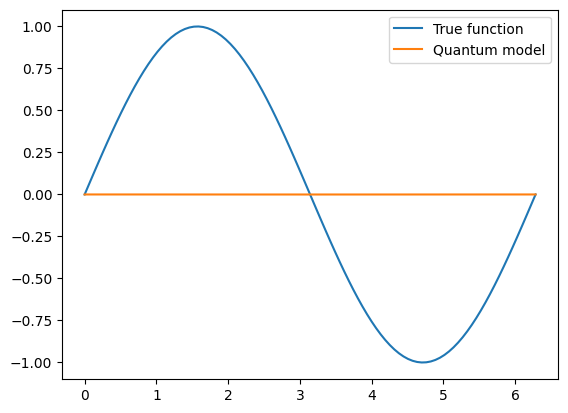

In [7]:
predictions = [quantum_circuit(params, x) for x in X]
plt.plot(X, Y, label="True function")
plt.plot(X, predictions, label="Quantum model")
plt.legend()
plt.show()


Conclusion:
This code effectively demonstrates how to use a quantum neural network to learn the sine function.
By defining a quantum circuit, calculating a cost function, and employing an optimizer, the model adjusts its parameters to minimize the error in predictions. The final plot visually compares the true sine function with the model's predictions, showcasing the potential of quantum computing in function approximation tasks.

In [8]:
import jax
import jax.numpy as jnp
from jax import grad, jit
import matplotlib.pyplot as plt

In [9]:
#Define the quantum neural network:

def quantum_neural_network(params, x):
# Example quantum neural network using parameterized gates
    return jnp.sin(params[0] * x + params[1])

In [10]:
#Define the loss function:

def loss(params, x, y):
    predictions = quantum_neural_network(params, x)
    return jnp.mean((predictions - y) ** 2)

In [11]:
X = jnp.linspace(0, 2 * jnp.pi, 100)
Y = jnp.sin(X)

In [12]:
params = jnp.array([1.0, 0.0])
learning_rate = 0.01

for i in range(1000):
    grads = grad(loss)(params, X, Y)
    params = params - learning_rate * grads
    if (i + 1) % 100 == 0:
        print(f"Loss after {i+1} steps: {loss(params, X, Y)}")

Loss after 100 steps: 0.0
Loss after 200 steps: 0.0
Loss after 300 steps: 0.0
Loss after 400 steps: 0.0
Loss after 500 steps: 0.0
Loss after 600 steps: 0.0
Loss after 700 steps: 0.0
Loss after 800 steps: 0.0
Loss after 900 steps: 0.0
Loss after 1000 steps: 0.0


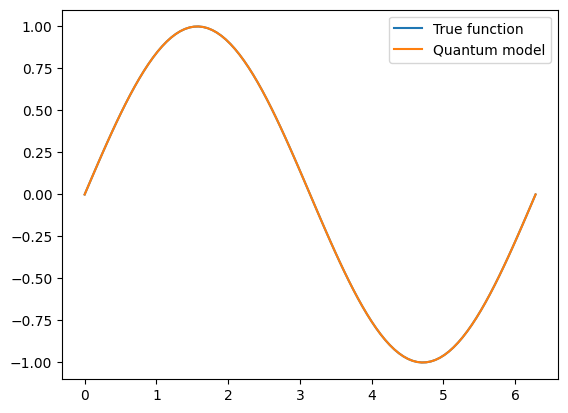

In [13]:
predictions = quantum_neural_network(params, X)
plt.plot(X, Y, label="True function")
plt.plot(X, predictions, label="Quantum model")
plt.legend()
plt.show()